# Capstone Project - The Battle of Neighborhoods (Week 2)

## The Project Contains the following sections:
1.	Data Preprocessing 
2.	Preforming exploratory data analysis on the world data using Plotly, Matplotlib and seaborn
3.	Visualizing the geospatial data concerning china using Folium 
4.	Bulid Linear Regression classifier to predict the number of recovered cases 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Libraries imported.')

Libraries imported.


In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
path = 'C:\\Users\\shima\\Downloads\\Programing Projects\\CP_IBM\\coronavirus-2019ncov_important\\covid-19-all.csv'
covid_2019 = pd.read_csv(path)

## Part 1: Data Preprocessing

In [4]:
covid_2019.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,Mainland China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
1,Mainland China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
2,Mainland China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
3,Mainland China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
4,Mainland China,Gansu,36.0611,103.8343,NaN,NaN,NaN,2020-01-22


In [5]:
#Checking the number of missing values
covid_2019.isna().sum()

Country/Region       0
Province/State    1924
Latitude             1
Longitude            1
Confirmed           19
Recovered          388
Deaths             441
Date                 0
dtype: int64

In [6]:
covid_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 8 columns):
Country/Region    5153 non-null object
Province/State    3229 non-null object
Latitude          5152 non-null float64
Longitude         5152 non-null float64
Confirmed         5134 non-null float64
Recovered         4765 non-null float64
Deaths            4712 non-null float64
Date              5153 non-null object
dtypes: float64(5), object(3)
memory usage: 322.2+ KB


In [7]:
covid_2019.columns

Index(['Country/Region', 'Province/State', 'Latitude', 'Longitude',
       'Confirmed', 'Recovered', 'Deaths', 'Date'],
      dtype='object')

In [8]:
covid_2019.describe()

,Latitude,Longitude,Confirmed,Recovered,Deaths
count,5152.000000,5152.000000,5134.000000,4765.000000,4712.000000
mean,30.999920,37.934538,580.224192,222.521721,19.533956
std,19.639945,90.305023,4970.350312,2334.323350,202.150636
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,26.000000,-62.833300,2.000000,0.000000,0.000000
50%,35.443700,81.000000,9.000000,1.000000,0.000000
75%,41.902900,113.614000,93.000000,18.000000,1.000000
max,64.963100,174.886000,67781.000000,50318.000000,3056.000000


In [9]:
covid_2019["Date"] = covid_2019["Date"].apply(str)

In [10]:
# id the province is NaN it will be the same as the country or region name
def null_province(pro , Cou):
    if pro is np.NaN:
        pro = Cou
        return pro
    else:
        return pro

In [11]:
covid_2019['Province/State'] = covid_2019.apply(lambda x: null_province(x['Province/State'],x['Country/Region']), axis=1)

In [12]:
print('Index of null Latitude: ', covid_2019[covid_2019["Latitude"].isnull()]['Latitude'])
print('Index of null Longitude: ', covid_2019[covid_2019['Longitude'].isnull()]['Longitude'])

Index of null Latitude:  2663   NaN
Name: Latitude, dtype: float64
Index of null Longitude:  2663   NaN
Name: Longitude, dtype: float64


In [13]:
#dropping the null value
covid_2019.drop( 2663, inplace=True)

In [14]:
covid_2019.isnull().sum()

Country/Region      0
Province/State      0
Latitude            0
Longitude           0
Confirmed          19
Recovered         388
Deaths            441
Date                0
dtype: int64

In [15]:
covid_2019[['Confirmed', 'Recovered', 'Deaths']] =covid_2019[['Confirmed', 'Recovered', 'Deaths']].replace(np.NaN, 0 )

In [16]:
covid_2019.isnull().sum()

Country/Region    0
Province/State    0
Latitude          0
Longitude         0
Confirmed         0
Recovered         0
Deaths            0
Date              0
dtype: int64

In [17]:
covid_2019.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,Mainland China,Anhui,31.8257,117.2264,1.0,0.0,0.0,2020-01-22
1,Mainland China,Beijing,40.1824,116.4142,14.0,0.0,0.0,2020-01-22
2,Mainland China,Chongqing,30.0572,107.8740,6.0,0.0,0.0,2020-01-22
3,Mainland China,Fujian,26.0789,117.9874,1.0,0.0,0.0,2020-01-22
4,Mainland China,Gansu,36.0611,103.8343,0.0,0.0,0.0,2020-01-22


## Part 2: Exploratory Data Analysis 

In [18]:
China = covid_2019[covid_2019['Country/Region'] == 'Mainland China']

In [19]:
China.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,Mainland China,Anhui,31.8257,117.2264,1.0,0.0,0.0,2020-01-22
1,Mainland China,Beijing,40.1824,116.4142,14.0,0.0,0.0,2020-01-22
2,Mainland China,Chongqing,30.0572,107.8740,6.0,0.0,0.0,2020-01-22
3,Mainland China,Fujian,26.0789,117.9874,1.0,0.0,0.0,2020-01-22
4,Mainland China,Gansu,36.0611,103.8343,0.0,0.0,0.0,2020-01-22


In [20]:
China.shape

(1517, 8)

In [21]:
China.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 5147
Data columns (total 8 columns):
Country/Region    1517 non-null object
Province/State    1517 non-null object
Latitude          1517 non-null float64
Longitude         1517 non-null float64
Confirmed         1517 non-null float64
Recovered         1517 non-null float64
Deaths            1517 non-null float64
Date              1517 non-null object
dtypes: float64(5), object(3)
memory usage: 106.7+ KB


In [22]:
#seperating the cases 
C = covid_2019.groupby('Date').sum()['Confirmed'].reset_index()
R = covid_2019.groupby('Date').sum()['Recovered'].reset_index()
D = covid_2019.groupby('Date').sum()['Deaths'].reset_index()

In [23]:
C.head()

,Date,Confirmed
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [24]:

layout = go.Layout(
    xaxis=dict(
        title='Date from 22- 1-2020 to 13- 3 -2020',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
    ),
    yaxis=dict(
        title='Number of Cases',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=C['Date'], y= C['Confirmed'],
                    mode='lines',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x= R['Date'] , y= R['Recovered'],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=D['Date'], y=D['Deaths'],
                    mode='markers', name='Deaths'))

fig.show()

In [25]:
China_C = China.groupby('Date').sum()['Confirmed'].reset_index()
China_R = China.groupby('Date').sum()['Recovered'].reset_index()
China_D = China.groupby('Date').sum()['Deaths'].reset_index()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x= China_C['Date'],
                y= China_C['Confirmed'],
                name='Confirmed',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x= China_R['Date'],
                y= China_R['Recovered'] ,
                name='Recovered',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x= China_D['Date'],
                y= China_D['Deaths'] ,
                name='Deaths',
                marker_color='rgb(20, 10, 200)'
                ))
fig.update_layout(
    title='nCOV-2019 Cases in China',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

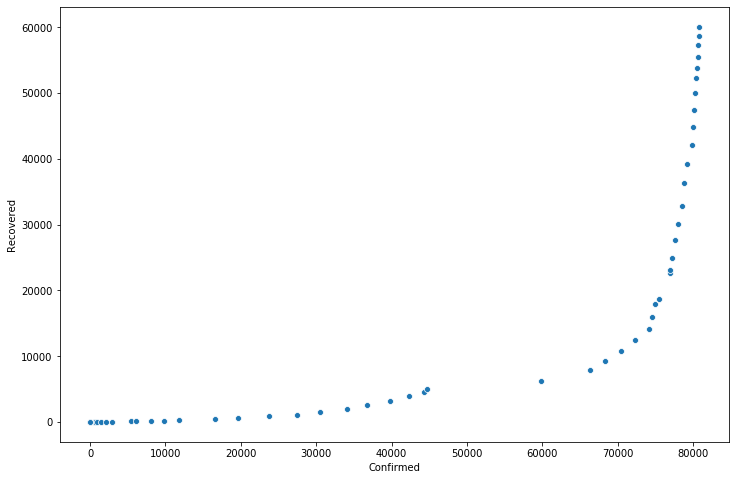

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = China_C['Confirmed'], y = China_R['Recovered'], data= China)

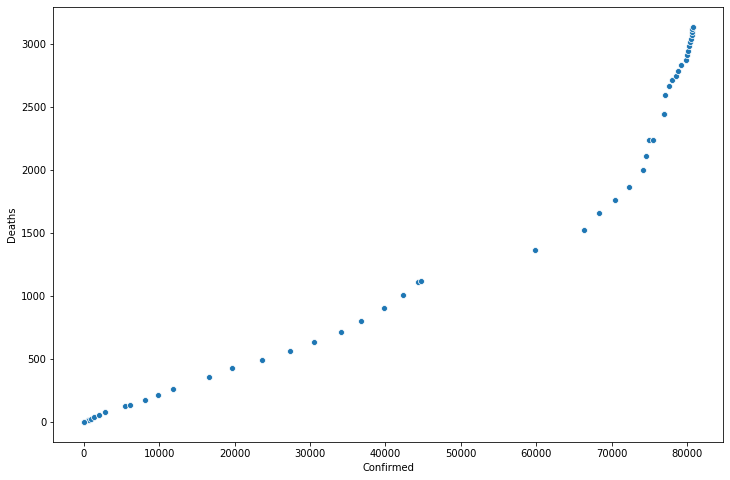

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = China_C['Confirmed'], y = China_D['Deaths'], data= China)

In [29]:
fig = px.box(China, x="Province/State", y="Confirmed", width= 1000, height= 800)
fig.show()

In [30]:
layout = go.Layout(
    xaxis=dict(
        title='Hubei Cases from 22- 1-2020 to 13- 3 -2020',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
    ),
    yaxis=dict(
        title='Number of Cases',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=China_C['Date'], y= China[China['Province/State'] == 'Hubei']['Confirmed'],
                    mode='lines',
                    name='Confirmed Cases'))

fig.add_trace(go.Scatter(x=China_C['Date'], y= China[China['Province/State'] == 'Hubei']['Recovered'],
                    mode='lines',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=China_C['Date'], y= China[China['Province/State'] == 'Hubei']['Deaths'],
                    mode='lines',
                    name='Deaths'))

fig.show()

## Part 3: Vis the data Using Folium

In [31]:
fig = px.scatter_geo( covid_2019 , lat = covid_2019['Latitude'], lon = covid_2019['Longitude'], color="Confirmed",
                     hover_name="Confirmed",
                     animation_frame="Date",
                     projection= 'natural earth')
fig.show()

In [32]:
China_map = folium.Map(location=[ 35.8617 , 104.1954],zoom_start= 4)

In [33]:
China_map

In [34]:
for lat, lng, prov, conf in zip(China['Latitude'], China['Longitude'],China['Province/State'], China['Confirmed']):
    label = '{}, Confirmed cases: {}'.format( prov, conf)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= 5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(China_map)  

In [35]:
China_map

## Part 4: Bulding Regression Model

In [36]:
covid_2019['Day'] =pd.DatetimeIndex(covid_2019['Date']).day
covid_2019['Month'] =pd.DatetimeIndex(covid_2019['Date']).month

In [37]:
covid_2019.drop('Date', axis=1)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Day,Month
0,Mainland China,Anhui,31.8257,117.2264,1.0,0.0,0.0,22,1
1,Mainland China,Beijing,40.1824,116.4142,14.0,0.0,0.0,22,1
2,Mainland China,Chongqing,30.0572,107.8740,6.0,0.0,0.0,22,1
3,Mainland China,Fujian,26.0789,117.9874,1.0,0.0,0.0,22,1
4,Mainland China,Gansu,36.0611,103.8343,0.0,0.0,0.0,22,1
...,...,...,...,...,...,...,...,...,...
5148,US,Alaska,61.3707,-152.4044,0.0,0.0,0.0,12,3
5149,US,Idaho,44.2405,-114.4788,0.0,0.0,0.0,12,3
5150,US,Maine,44.6939,-69.3819,0.0,0.0,0.0,12,3
5151,US,West Virginia,38.4912,-80.9545,0.0,0.0,0.0,12,3


In [38]:
covid_2019.columns

Index(['Country/Region', 'Province/State', 'Latitude', 'Longitude',
       'Confirmed', 'Recovered', 'Deaths', 'Date', 'Day', 'Month'],
      dtype='object')

In [39]:
X= covid_2019[['Latitude', 'Longitude','Confirmed' , 'Deaths', 'Day', 'Month']]
y =covid_2019['Recovered']   

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
print(X_train.shape)
print(y_test.shape)

(3451, 6)
(1701,)


In [47]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train, y_train)
test_pred = linear_model.predict(X_test)


MAE: 247.2532891323024
MSE: 693826.2898917153


In [48]:
coeffecients = pd.DataFrame(linear_model.coef_,X.columns) 
coeffecients.columns = ['Coeffecient'] 
coeffecients

,Coeffecient
Latitude,2.488776
Longitude,1.652248
Confirmed,-0.811791
Deaths,31.282893
Day,3.154007
Month,155.933535


In [49]:
print('MAE:', mean_absolute_error(test_pred, y_test))
print('MSE:',mean_squared_error(test_pred, y_test))

MAE: 247.2532891323024
MSE: 693826.2898917153


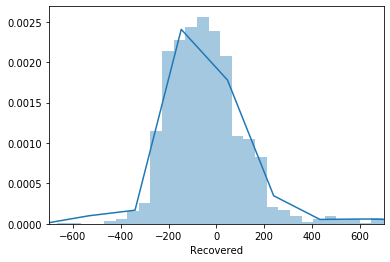

In [50]:
fig, ax = plt.subplots()
sns.distplot((y_test- test_pred), ax=ax, bins =500)
ax.set_xlim(-700,700)
plt.show()